In [42]:
import matplotlib.pyplot as plt

In [43]:
import numpy as np

In [44]:
d1_chiqui1 = [2.6/100,2.3/100,2/100,1.9/100,1.8/100]# convertir cm a m
ancho_d1_chiqui1 = [0.4/100, 0.5/100, 0.5/100, 0.4/100, 0.5/100]
d2_grande1 = [4.3/100,3.8/100,3.5/100,3.2/100,3.1/100]
ancho_d2_grande1 = [0.7/100, 0.5/100, 0.5/100, 0.7/100, 0.5/100]
voltaje1 = [2.54*1000, 3.00*1000, 3.51*1000, 4.00*1000, 4.51*1000] # convertir kv a v

In [45]:
c_v1 = [1/np.sqrt(i) for i in voltaje1]

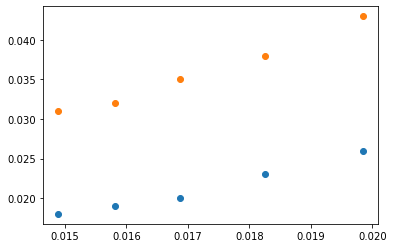

In [46]:
plt.scatter(c_v1,d1_chiqui1)
plt.scatter(c_v1,d2_grande1)
plt.show()

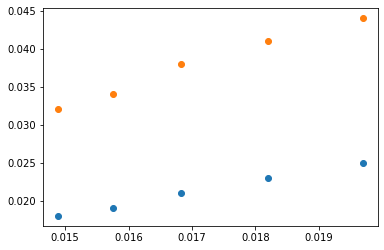

In [47]:
d1_chiqui2 = [2.5/100,2.3/100,2.1/100,1.9/100,1.8/100]   # convertir cm a m
ancho_d1_chiqui2 = [0.7/100, 0.7/100, 0.6/100, 0.6/100, 0.6/100]
d2_grande2 = [4.4/100,4.1/100,3.8/100,3.4/100,3.2/100]
ancho_d2_grande2 = [0.6/100, 0.8/100, 0.7/100, 0.6/100, 0.5/100]
voltaje2 = [2.58*1000, 3.02*1000, 3.53*1000,4.03*1000,4.51*1000 ] # convertir kv a v
c_v2 = [1/np.sqrt(i) for i in voltaje2]
plt.scatter(c_v2, d1_chiqui2)
plt.scatter(c_v2,d2_grande2)
plt.show()

In [48]:
import propagacion_de_incertidumbres as pinc

Ahora solo tenemos que alterar los datos para que sean tuplas recordando que las inceprtidumbres de los radios son el 5$\%$ de la magnitud total.

In [49]:
r11 = [(i,0.5*j) for i,j in zip(d1_chiqui1, ancho_d1_chiqui1)]
r21 = [(i,0.5*j) for i,j in zip(d2_grande1, ancho_d2_grande1)]
r12 = [(i,0.5*j) for i,j in zip(d1_chiqui2, ancho_d1_chiqui2)]
r22 = [(i,0.5*j) for i,j in zip(d2_grande2, ancho_d2_grande2)]

Ahora para obtener las incertidumbres de los voltajes primero tenemos que cambiar las los voltajes. Cons sus incertidumbres:

In [50]:
v1_inc = [(i,0.005) for i in voltaje1]
v2_inc = [(i,0.005) for i in voltaje2]

Ahora tomando en cuenta que necesito cambiar de variable a $1/\sqrt{x}$ entonces necesito deducir la incertidumbre de este experimento:

$$\sigma_{1/\sqrt{x}} = |(1/\sqrt{x})'|\sigma_x = \frac{1}{2x^{3/2}}\sigma_x$$


In [51]:
def der1(x):
    return(1/(2*x[0]**(2/3)))

In [52]:
c_v1_inc = [(1/np.sqrt(i[0]),der1(i)*i[1]) for i in v1_inc]
c_v2_inc = [(1/np.sqrt(i[0]),der1(i)*i[1]) for i in v2_inc]

Las pendientes y ordenadas al origen con sus respectivas incertidumbres son:

In [53]:
m11, o11, inc_m11, inc_o11, rc11 = pinc.calcula_m_o_inc_m_y_ord(c_v1_inc,r11)
m21, o21, inc_m21, inc_o21, rc21 = pinc.calcula_m_o_inc_m_y_ord(c_v1_inc,r21)
m12, o12, inc_m12, inc_o12, rc12 = pinc.calcula_m_o_inc_m_y_ord(c_v1_inc,r12)
m22, o22, inc_m22, inc_o22, rc22 = pinc.calcula_m_o_inc_m_y_ord(c_v2_inc,r22)

In [54]:
r11_m, r11_i = [i[0] for i in r11], [i[1] for i in r11]
r21_m, r21_i = [i[0] for i in r21], [i[1] for i in r21]
r12_m, r12_i = [i[0] for i in r12], [i[1] for i in r12]
r22_m, r22_i = [i[0] for i in r22], [i[1] for i in r22]
cv1inc_m, cv1inc_i = [i[0] for i in c_v1_inc], [i[1] for i in c_v1_inc]
cv2inc_m, cv2inc_i = [i[0] for i in c_v2_inc], [i[1] for i in c_v2_inc]

In [55]:
x = np.linspace(0.01,0.05,1000)
y11 = [m11*i + o11 for i in x]
y21 = [m21*i + o21 for i in x]
y12 = [m12*i + o12 for i in x]
y22 = [m22*i + o22 for i in x]

In [56]:
import matplotlib.pyplot as plt

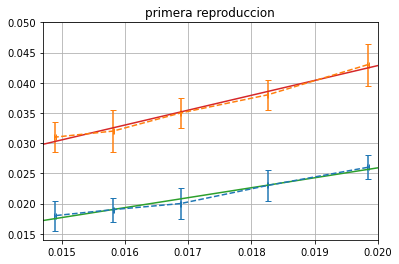

In [59]:
plt.errorbar(y = r11_m, x = cv1inc_m,yerr = r11_i,xerr = cv1inc_i, fmt='--', markersize=3, capsize=3, label = "radio1")
plt.errorbar(y = r21_m, x = cv1inc_m,yerr = r21_i,xerr = cv1inc_i, fmt='--', markersize=3, capsize=3, label = "radio1")
plt.plot(x,y11)
plt.plot(x,y21)
plt.title("primera reproduccion")
plt.xlim(0.0147, 0.020)
plt.ylim(0.014, 0.05)
plt.grid()
plt.show()

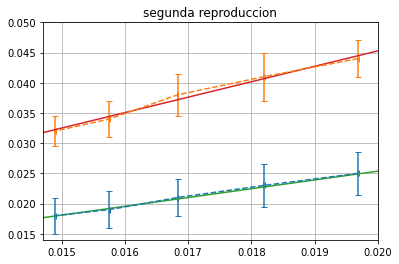

In [60]:
plt.errorbar(y = r12_m, x = cv2inc_m,yerr = r12_i,xerr = cv2inc_i, fmt='--', markersize=3, capsize=3, label = "radio1")
plt.errorbar(y = r22_m, x = cv2inc_m,yerr = r22_i,xerr = cv2inc_i, fmt='--', markersize=3, capsize=3, label = "radio1")
plt.plot(x,y12)
plt.plot(x,y22)
plt.title("segunda reproduccion")
plt.xlim(0.0147, 0.020)
plt.ylim(0.014, 0.05)
plt.grid()
plt.show()

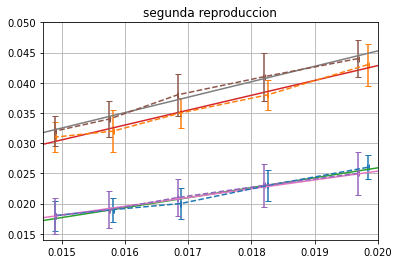

In [61]:
plt.errorbar(y = r11_m, x = cv1inc_m,yerr = r11_i,xerr = cv1inc_i, fmt='--', markersize=3, capsize=3, label = "radio1")
plt.errorbar(y = r21_m, x = cv1inc_m,yerr = r21_i,xerr = cv1inc_i, fmt='--', markersize=3, capsize=3, label = "radio1")
plt.plot(x,y11)
plt.plot(x,y21)
plt.errorbar(y = r12_m, x = cv2inc_m,yerr = r12_i,xerr = cv2inc_i, fmt='--', markersize=3, capsize=3, label = "radio1")
plt.errorbar(y = r22_m, x = cv2inc_m,yerr = r22_i,xerr = cv2inc_i, fmt='--', markersize=3, capsize=3, label = "radio1")
plt.plot(x,y12)
plt.plot(x,y22)
plt.title("segunda reproduccion")
plt.xlim(0.0147, 0.020)
plt.ylim(0.014, 0.05)
plt.grid()
plt.show()

In [62]:
print("La pendiente del primer radio peque es: \n", m11, o11, "\n",
     "La pendiente del primer radio gde es: \n", m21, o21,"\n",
     "La pendiente del segundo radio peque es: \n", m12, o12,"\n",
     "La pendiente del segundo radio gde es: \n", m22, o22)

La pendiente del primer radio peque es: 
 1.6458201445853107 -0.007002864526711111 
 La pendiente del primer radio gde es: 
 2.4586658409962805 -0.006331833091361625 
 La pendiente del segundo radio peque es: 
 1.4539468614205975 -0.0037149133923220553 
 La pendiente del segundo radio gde es: 
 2.5527904997696633 -0.005780453451546427


Ahora bien, consideremos la distancia interplanar dada por el orden dos de difracción, la razón se discutió en el reporte experimental.
$$d = 2\frac{Lh}{k_i\sqrt{2me}}$$

In [70]:
L = 0.130
h = 6.63E-34
m = 9.1E-31
e = 1.6e-19
cte = L*h/(np.sqrt(2*m*e))

In [71]:
def calc(p):
    return((1/(p))*cte)

In [79]:
d11 = 2*calc(m11)
d21 = 2*calc(m21)
d12 = 2*calc(m12)
d22 = 2*calc(m22)

In [80]:
print("la distancia interplanar 1 de la reproducción 1 es: ", d11, "\n",
     "la distancia interplanar 2 de la reproducción 1 es: ", d21, "\n",
     "la distancia interplanar 1 de la reproducción 2 es: ", d12, "\n",
     "la distancia interplanar 2 de la reproducción 2 es: ", d22, "\n")

la distancia interplanar 1 de la reproducción 1 es:  1.940925283154738e-10 
 la distancia interplanar 2 de la reproducción 1 es:  1.299246882958524e-10 
 la distancia interplanar 1 de la reproducción 2 es:  2.1970637407132421e-10 
 la distancia interplanar 2 de la reproducción 2 es:  1.251341984561305e-10 



Ahora como se tuvo que realizar un cálculo del tipo $\frac{1}{\rho}\times cte$ tenemso que propagar de manera correcta el error de cada medición para ello recordemos de vuelta que:
$$\sigma_{cte(1/x)} = |cte(1/x)'|\sigma_x = cte\frac{1}{x^2}\sigma_x$$

In [81]:
def inc_dos(x, inc):
    return((1/x**2)*inc)

In [82]:
#Calculamos las incertidumbres de cada valor de distancia interplanar:
inc_m11 = cte*inc_dos(m11,inc_m11)
inc_m21 = cte*inc_dos(m21,inc_m21)
inc_m12 = cte*inc_dos(m12,inc_m12)
inc_m22 = cte*inc_dos(m22,inc_m22)
lista_pendientes_con_inc = [(d11, inc_m11),(d21, inc_m21),(d12, inc_m12),(d22, inc_m22)]

In [83]:
print("La distancia interplanar d1 con incertidumbre de la primera reproducción es:", lista_pendientes_con_inc[0], "\n"
      "La distancia interplanar d2 con incertidumbre de la primera reproducción es:", lista_pendientes_con_inc[1], "\n"
      "La distancia interplanar d1 con incertidumbre de la segunda reproducción es:", lista_pendientes_con_inc[2], "\n"
      "La distancia interplanar d2 con incertidumbre de la segunda reproducción es:", lista_pendientes_con_inc[3], "\n"
      )

La distancia interplanar d1 con incertidumbre de la primera reproducción es: (1.940925283154738e-10, 1.877097081545723e-41) 
La distancia interplanar d2 con incertidumbre de la primera reproducción es: (1.299246882958524e-10, 4.6847071927176434e-43) 
La distancia interplanar d1 con incertidumbre de la segunda reproducción es: (2.1970637407132421e-10, 9.239750538450686e-41) 
La distancia interplanar d2 con incertidumbre de la segunda reproducción es: (1.251341984561305e-10, 3.8752050022044e-43) 



In [99]:
#promedio de d1 y de d2:
d1_prom = ((lista_pendientes_con_inc[0][0]+lista_pendientes_con_inc[2][0])/2,(lista_pendientes_con_inc[0][1]+lista_pendientes_con_inc[2][1])/2 )
d2_prom = ((lista_pendientes_con_inc[1][0]+lista_pendientes_con_inc[3][0])/2,(lista_pendientes_con_inc[1][1]+lista_pendientes_con_inc[3][1])/2 )
print("La distancia interplanar 1 promedio es:", d1_prom, "\n",
     "La distancia interplanar 2 promedio es:", d2_prom, "\n")

La distancia interplanar 1 promedio es: (2.0689945119339902e-10, 5.558423809998204e-41) 
 La distancia interplanar 2 promedio es: (1.2752944337599145e-10, 4.279956097461022e-43) 



Finalmente para encontrar la longitud de onda del electrón basta utilizar que:
$$\lambda = \frac{h}{\sqrt{2meU}}$$

In [90]:
cte = h/np.sqrt(2*m*e)
long_onda_rep1 = [(cte * i[0],cte * i[1]) for i in c_v1_inc]
long_onda_rep2 = [(cte * i[0],cte * i[1]) for i in c_v2_inc]

In [92]:
print("Las longitudes de onda de la primera reproducción son \n",long_onda_rep1, "\n",
     "Las longitudes de onda de la segunda reproducción son \n",long_onda_rep1, "\n")

Las longitudes de onda son 
 [(2.4378163461759767e-11, 1.6499421120990625e-14), (2.2431443173749274e-11, 1.476648114789841e-14), (2.073787655015633e-11, 1.3299024133081335e-14), (1.9426199632013904e-11, 1.218946161813364e-14), (1.8294880292476898e-11, 1.1252270326145505e-14)] 
 Las longitudes de onda son 
 [(2.4378163461759767e-11, 1.6499421120990625e-14), (2.2431443173749274e-11, 1.476648114789841e-14), (2.073787655015633e-11, 1.3299024133081335e-14), (1.9426199632013904e-11, 1.218946161813364e-14), (1.8294880292476898e-11, 1.1252270326145505e-14)] 



Finalmente tenemos que calcular las distancias interatómicas, para hacerlo basta usar que:
$$\Delta = \frac{d_2}{\sin(60^\circ)}$$

In [97]:
cte_3 = 1/np.sin(np.pi/3)
#obtenemos dos distancias interatómicas puesto que tenemos dos reproducciones para d_2
Delta_1 = (cte_3 * lista_pendientes_con_inc[1][0], cte_3 * lista_pendientes_con_inc[1][1])
Delta_2 = (cte_3 * lista_pendientes_con_inc[3][0], cte_3 * lista_pendientes_con_inc[3][1])
Delta_prom = ((Delta_1[0]+Delta_2[0])/2, (Delta_1[1]+Delta_2[1])/2)
print("La distancia interatómica medida con la primera reproducción experimental es:", Delta_1 , "\n",
     "La distancia interatómica medida con la segunda reproducción experimental es:", Delta_2 , "\n",
     "La distancia interatómica promedio es:", Delta_prom , "\n")

La distancia interatómica medida con la primera reproducción experimental es: (1.5002410752397724e-10, 5.409433917580216e-43) 
 La distancia interatómica medida con la segunda reproducción experimental es: (1.4449252632695e-10, 4.47470130237539e-43) 
 La distancia interatómica promedio es: (1.4725831692546363e-10, 4.9420676099778025e-43) 



## Errores

In [100]:
#Medidas exactas:
dist_interatom_correcta = 1.23E-10/np.sin(np.pi/3)
d_1 = 2.13E-10
d_2 = 1.23E-10

In [101]:
def error_porcent(xlit,xmed):
    return((np.abs(xlit-xmed[0])/xlit)*100)

In [103]:
err_dist_interatom = error_porcent(dist_interatom_correcta, Delta_prom)
err_d1 = error_porcent(d_1, d1_prom)
err_d2 = error_porcent(d_2, d2_prom)
print("El error porcentual de la distancia interatómica es:", err_dist_interatom, "%\n",
     "El error porcentual de la distancia interplanar 1 es:", err_d1, "%\n",
     "El error porcentual de la distancia interplanar 2 es:", err_d2, "%\n",)

El error porcentual de la distancia interatómica es: 3.682474289423966 %
 El error porcentual de la distancia interplanar 1 es: 2.864107420939422 %
 El error porcentual de la distancia interplanar 2 es: 3.682474289423953 %

